## **1. Download dataset**
!gdown --id 1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_
!unzip twitter_sentiment_analysis_3cls_dataset.zip

## **2. Import libraries**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **3. Read dataset**

In [85]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(
    filepath_or_buffer=dataset_path
)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## **4. Drop missing value**

In [87]:
null_rows = df.isnull().any(axis=1)
df[null_rows]

,clean_text,category
148,NaN,0.0
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
158694,NaN,-1.0
159442,chidambaram gives praises modinomics,NaN
159443,NaN,0.0
160559,the reason why modi contested from seats 2014 ...,NaN


In [88]:
df = df.dropna()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


## **5. Preprocessing data**



In [90]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()
    
    # Remove retweet old acronym "RT"
    text = re.sub(r'rt[\s]+', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text

In [91]:
df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))

C:\Users\chaum\AppData\Local\Temp\ipykernel_15032\2442437572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))


In [92]:
df

,clean_text,category
0,when modi promis minimum govern maximum govern...,-1.0
1,talk all the nonsens and continu all the drama...,0.0
2,what did just say vote for modi welcom bjp tol...,1.0
3,ask his support prefix chowkidar their name mo...,1.0
4,answer who among these the most power world le...,1.0
...,...,...
162975,whi these 456 crore paid neerav modi not recov...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interact forum where she left,0.0
162978,there big project came into india modi dream p...,0.0


## **6. One-hot encoding label**

In [93]:
n_classes = df['category'].nunique()
n_samples = df['category'].shape[0]
print(f'Number of classes: {n_classes}')
print(f'Number of samples: {n_samples}')

y = (df['category'].to_numpy() + 1).astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1
print(f'Shape of y_encoded: {y_encoded.shape}')

Number of classes: 3
Number of samples: 162969
Shape of y_encoded: (162969, 3)


## **7. Create train, val, test set**

In [94]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

x_train, x_val, y_train, y_val = train_test_split(
    df['clean_text'], y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

## **8. Tf-idf vectorizer**

In [95]:
vectorizer = TfidfVectorizer(max_features=2000)
x_train = vectorizer.fit_transform(x_train).toarray()
x_val = vectorizer.transform(x_val).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [96]:
x_train = np.concatenate(
    (np.ones((x_train.shape[0], 1)), x_train), 
    axis=1)

x_val = np.concatenate(
    (np.ones((x_val.shape[0], 1)), x_val), 
    axis=1)

x_test = np.concatenate(
    (np.ones((x_test.shape[0], 1)), x_test), 
    axis=1)

## **9. Define essential functions**

In [102]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]


def predict(x, theta):
    z = x @ theta
    return softmax(z)


def compute_loss(y_hat, y):
    return (-1 / y.size) * (y * np.log(y_hat)).sum()


def compute_gradient(x, y, y_hat):
    return x.T @ (y_hat - y) / y.size


def update_theta(theta, grad, lr):
    return theta - lr * grad


def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta)
    return (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

## **10. Declare parameters and initialize weights**

In [103]:
lr = 0.01
epochs = 10
batch_size = 1024
n_features = x_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)               

## **11. Training model**

In [104]:
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accuracy = []
    val_batch_losses = []
    val_batch_accuracy = []    
    
    for i in range(0, x_train.shape[0], batch_size):
        x_i = x_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        y_hat = predict(x_i, theta)
        train_batch_losses.append(compute_loss(y_hat, y_i))
        gradient = compute_gradient(x_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_accuracy.append(compute_accuracy(x_train, y_train, theta))
        
        y_hat_val = predict(x_val, theta)
        val_batch_losses.append(compute_loss(y_hat_val, y_val))
        val_batch_accuracy.append(compute_accuracy(x_val, y_val, theta))
        
    train_losses.append(np.mean(train_batch_losses))
    train_accuracy.append(np.mean(train_batch_accuracy))
    val_losses.append(np.mean(val_batch_losses))
    val_accuracy.append(np.mean(val_batch_accuracy))
    print(f'\nEPOCH {epoch + 1}: \tTraining loss: {train_losses[-1]:.3f}\tValidation loss: {val_losses[-1]:.3f}')


EPOCH 1: 	Training loss: 0.375	Validation loss: 0.374

EPOCH 2: 	Training loss: 0.372	Validation loss: 0.372

EPOCH 3: 	Training loss: 0.370	Validation loss: 0.370

EPOCH 4: 	Training loss: 0.369	Validation loss: 0.368

EPOCH 5: 	Training loss: 0.367	Validation loss: 0.367

EPOCH 6: 	Training loss: 0.366	Validation loss: 0.366

EPOCH 7: 	Training loss: 0.365	Validation loss: 0.365

EPOCH 8: 	Training loss: 0.365	Validation loss: 0.364

EPOCH 9: 	Training loss: 0.364	Validation loss: 0.364

EPOCH 10: 	Training loss: 0.364	Validation loss: 0.363


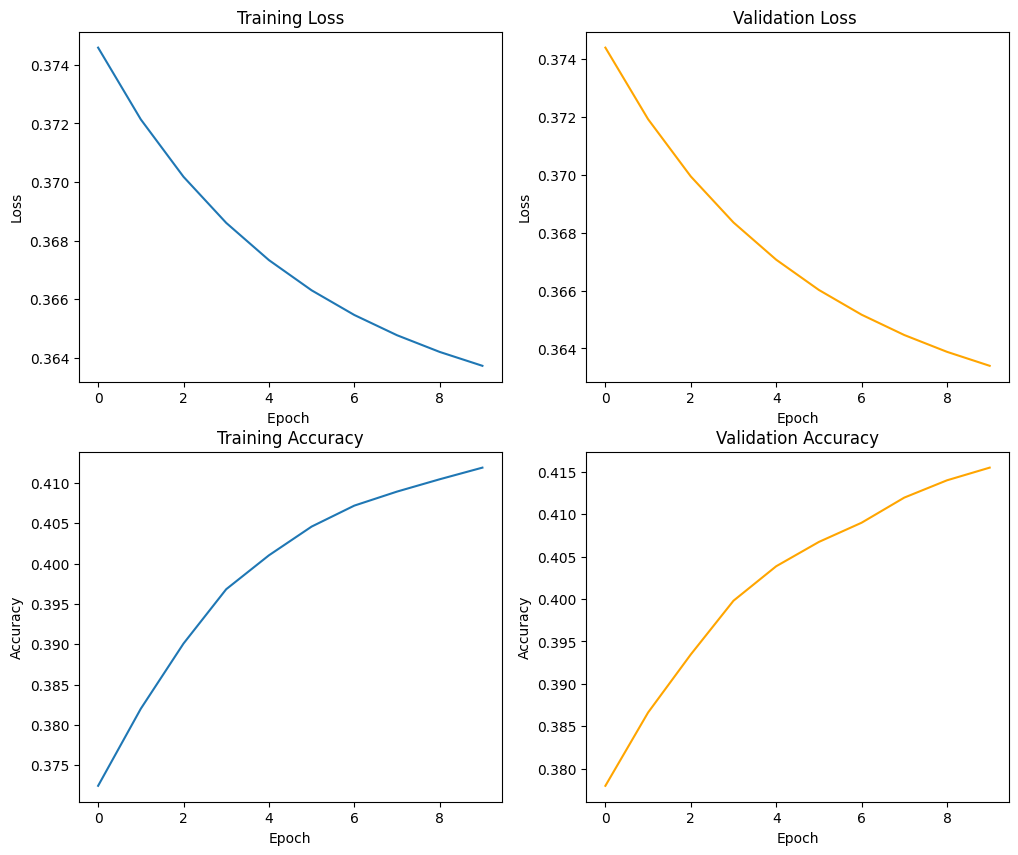

In [105]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch ', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss ')

ax[1, 0].plot(train_accuracy)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracy, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## **12. Evaluation**

In [106]:
val_set_acc = compute_accuracy(x_val, y_val, theta)
test_set_acc = compute_accuracy(x_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Evaluation accuracy: {val_set_acc}')
print(f'Validation accuracy: {test_set_acc}')

Evaluation on validation and test set:
Evaluation accuracy: 0.4159968092286924
Validation accuracy: 0.4166410995888814
